# 2. Machine Learning for Regression

 - 2.1 Car price prediction project
 - 2.2 Data preparation
 - 2.3 Exploratory data analysis
 - 2.4 Setting up the validation framework
 - 2.5 Linear regression
 - 2.6 Linear regression: vector form
 - 2.7 Training linear regression: Normal equation
 - 2.8 Baseline model for car price prediction project
 - 2.9 Root mean squared error
 - 2.10 Using RMSE on validation data
 - 2.11 Feature engineering
 - 2.12 Categorical variables
 - 2.13 Regularization
 - 2.14 Tuning the model
 - 2.15 Using the model
 - 2.16 Car price prediction project summary

# 2.1 Car price prediction project

Project plan:

- Prepare data and Exploratory data analysis (EDA)
- Use linear regression for predicting price
- Understanding the internals of linear regression
- Evaluating the model with RMSE
- Feature engineering
- Regularization
- Using the model


First we import the libraries for manipulating data. Pandas is a python package used to analyze and manipulate data. NumPy is a python package used to work with arrays.

In [1]:
import pandas as pd
import numpy as np

# 2.2 Data preparation

Pandas attributes and methods:

- `pd.read.csv()` - read csv files
- `df.head()` - take a look of the dataframe
- `df.columns` - retrieve colum names of a dataframe
- `df.columns.str.lower()` - lowercase all the letters
- `df.columns.str.replace(' ', '_')` - replace the space separator
- `df.dtypes` - retrieve data types of all features
- `df.index` - retrieve indices of a dataframe

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

Using wget to download the data needed for this regression

In [3]:
!wget $data

--2022-09-13 14:15:17--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1.41M  77.3KB/s    in 25s     

2022-09-13 14:15:44 (58.1 KB/s) - ‘data.csv.3’ saved [1475504/1475504]



Load the file using pandas read `read_csv`function

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


`df.columns` is part of the Pandas library that will return the column names of the dataframe.

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

We want to clean up our column names to remove caps and replace spaces with underscores and the operations can be chained together and reassigned to the columns variable.  The `str.lower()` is a method for altering the selected string to all lower case.  The `str.replace()` method can be used to replace specific characters in the string, in this case we want to replace spaces in column names with an underscore so that we can use dot methods.  Dot methods will not work on strings with spaces.

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Now when we view the dataframe we can see that the column names no longer contain spaces and everything is lower case.

In [8]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


The `df.dytpes` shows us what type of data is contained in each column. We are particularlly interested in the "object" columns as they contain data in a string format.

In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

We can see in the dataframe that the data is also inconsistant in its formatting. Lets clean that up and we start by identifying which columns contain a string format, which is equated by the data type `object`

In [10]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

Now we want to select only those columns (or 'features') that are of the data type 'object'

In [11]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

Now that we know which features are objects we don't need the return showing us the data types and we can 'unselect' those by using `.index` to just retrieve the index

In [12]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

Lets transform those "object" containing column names to a python list and and assign the list to the variable named "strings".

In [13]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

Now we can create a short function that will iterate through each column in the variable list named "strings" and apply the `.lower` abd `.replace` methods to data contained within the column. After we call the df again we can see that all the 'object' data with in the dataframe has been transformed to remove spaces and remove all capitlization.

In [14]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory data analysis

Pandas attributes and methods:

- `df[col].unique()` - returns a list of unique values in the series
- `df[col].nunique()` - returns the number of unique values in the series
- `df.isnull().sum()` - retunrs the number of null values in the dataframe

Matplotlib and seaborn methods:

- `%matplotlib inline` - assure that plots are displayed in jupyter notebook's cells
- `sns.histplot()` - show the histogram of a series

Numpy methods:

- `np.log1p()` - applies log transformation to a variable and adds one to each result

Long-tail distributions usually confuse the ML models, so the recommendation is to transform the target variable distribution to a normal one whenever possible.



In [15]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [16]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

We want to learn more about the data that we are using. We can use some simple functions to more fully understand what the data contains.  

In [17]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

The above doesn't give us much detail, for instance, under 'make' it shows all bmw's but we can use the `unique` and `nunique` functions to get a little better understanding of what our data contains. This function will show us the first five unique items in each column and count the number of unique items in each column. For instance we can see there are 48 different manufacturers of cars in the dataset.

In [18]:
for col in df.columns:
    print(col) # prints the col name
    print(df[col].unique()[:5]) # prints the first 5 unique values in the col
    print(df[col].nunique()) # calculates the number of unique values in each col
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Let us see what the distribution of prices are, we can use visualization to do this. We will import Matplotlib and Seaborn.  Seaborn is a package built on top of the Matplotlib library that allows enhanced visualizations on data. The `%matplotlib inline` statement is notifying Jupyter Notebook that we will be doing some plotting.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

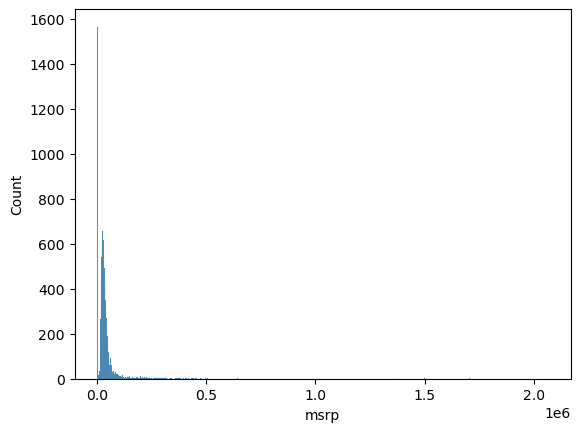

In [20]:
sns.histplot(df.msrp)

It isn't a very good plot right off the bat, we can increase it's readability.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

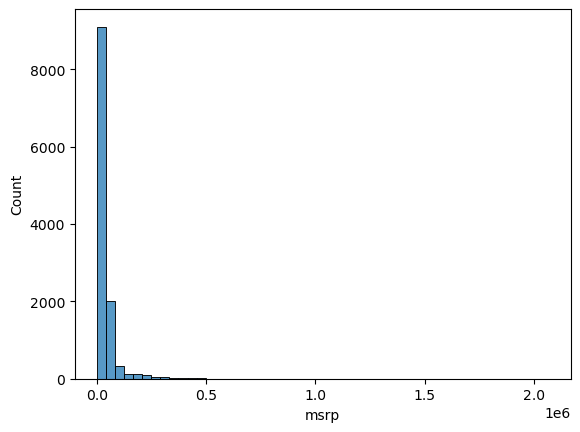

In [21]:
sns.histplot(df.msrp, bins=50) # bins allow us to group the data points into, well, bins

That is a very long tail, with most of the car prices grouped near the zeros and some cars valued up around 2 million. We will filter out some of the high price outliers to, perhaps, get a better representation of the data.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

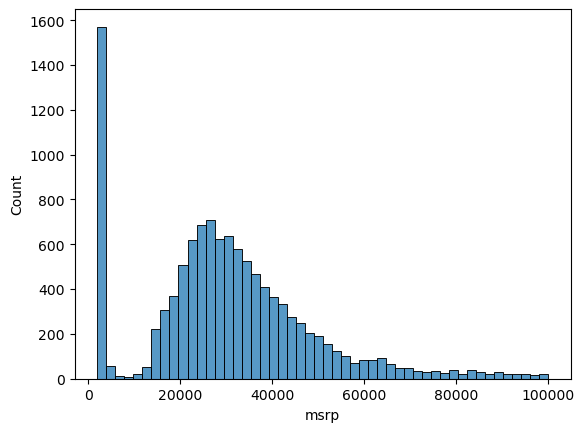

In [22]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Our data has that very long tail, which will confuse our model. We will have to do something to change this. Changing the prices to a logarithm scale, will group our prices closer. A standard practice in converting a log scale is adding 1 to each data point.  This ensures that there are no errors in the event that one of the points is a zero. For now we are doing this just to the plot the data and see that it is more of a normal distribution.  Later we will apply this log transformation to the "msrp" column of our dataset.

In [23]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Now we have our prices close together, our graph should look better.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

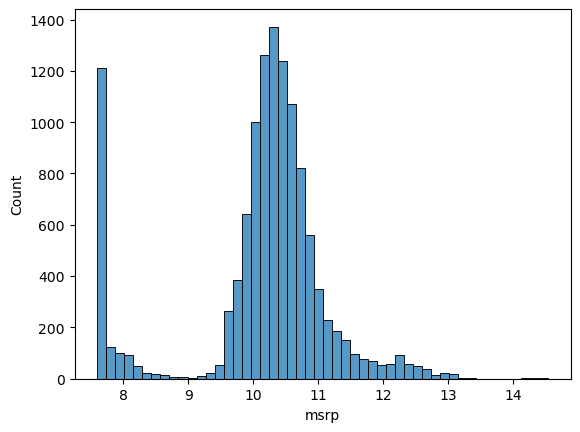

In [24]:
sns.histplot(price_logs, bins=50)

We have eliminated that long tail off to the right and now our data looks more like a normal distribution. 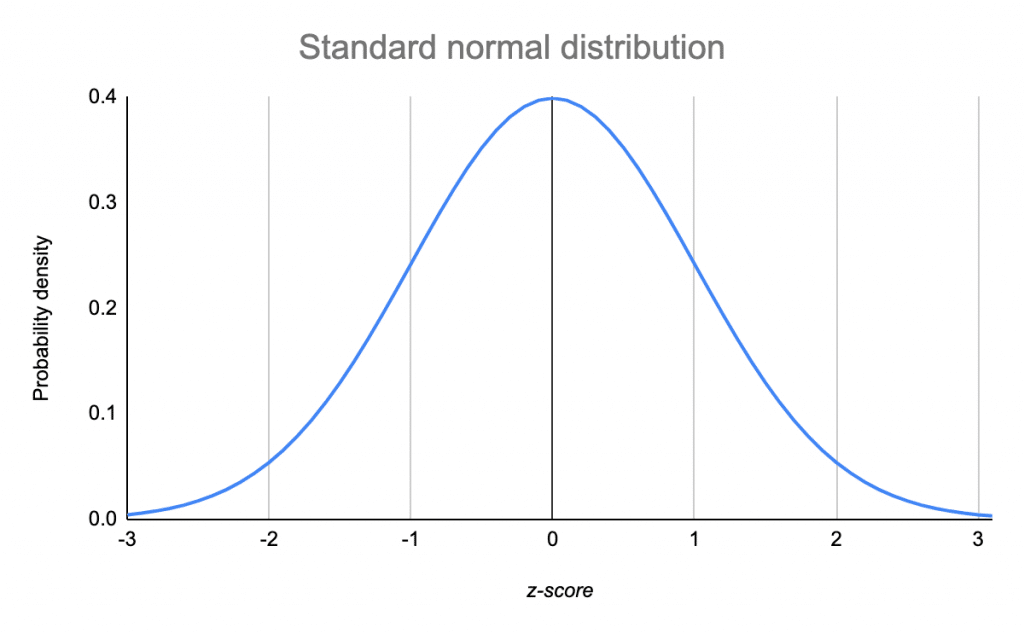

#### Missing values

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In general, the dataset is split into three parts: training, validation, and test. For each partition, we need to obtain feature matrices (X) and y vectors of targets. First, the size of partitions is calculated, records are shuffled to guarantee that values of the three partitions contain non-sequential records of the dataset, and the partitions are created with the shuffled indices.

Pandas attributes and methods:

- `df.iloc[]` - returns subsets of records of a dataframe, being selected by numerical indices
- `df.reset_index()` - restate the orginal indices
- `del df[col]` - eliminates target variable

Numpy methods:

- `np.arange()` - returns an array of numbers
- `np.random.shuffle()` - returns a shuffled array
- `np.random.seed()` - set a seed

Let's draw it

In [26]:
len(df)

11914

We have 11,914 records that need to be separated into training, validation and testing sets. Lets calculate how many records will be in each set using `len()` and some math. 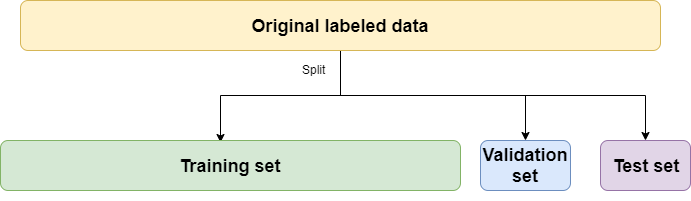

In [28]:
n = len(df)


n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(7150, 2382, 2382)

So our training set will contain 7,150 records, and the validation and test sets will contain 2382 each.

In [29]:
df.iloc[:10] # first 10 records

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [30]:
df.iloc[10:20] # second 10 records

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [31]:
df.iloc[11910:] #last 4 records because the dataset has 11,914 records

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


Now we could just grab our records using `.iloc` and the new variables we just set up.

In [32]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

The problem with breaking up our records like this will be that it isn't a cross-section of records.  For example, `df_train` will contain all of the bmw vehicles.  So we need to do something to fhuffle the records around.

In [33]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


We use the `np.arange` method to sort the dataframe and then assign it to the variable "idx".

In [52]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

Then we can use `.random.shuffle()` to shuffle everything around so that all the bmw's are not in the train test set.

Since I am doing this as part of the ml-zoomcamp class we want us to have the same shuffle for our data that our instructor has.  We can do this by using the `np.random.seed()` method. and then we will do the suffle again.

In [53]:
np.random.seed(2)
np.random.shuffle(idx)

In [54]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [55]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [56]:
len(df_train), len(df_val), len(df_val)

(7150, 2382, 2382)

In [57]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


Now that we have a randomly shuffled dataframe we want to reset the index so that is in numerical order.

In [58]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Before we start the regression problem we need to apply the log function to the "msrp" column so that the data doesn't have that long tail.

In [59]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

We will use the `np.log1p` function to perform this on the data.

In [60]:
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

The data above is a series, we will convert that to a pandas array and then assign it to the "y_train" variable and then we will do that to the other sets as well.

In [61]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

None of our df sets, i.e. df_test, need the msrp column because that is what we are trying to predict. We will delete that column from our df sets.

In [62]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [63]:
len(y_train)

7150

# 2.5 Linear regression

Model for solving regression tasks, in which the objective is to adjust a line for the data and make predictions on new values. The input of this model is the feature matrix and a y vector of predictions is obtained, trying to be as close as possible to the actual y values. The LR formula is the sum of the bias term (WO), which refers to the predictions if there is no information, and each of the feature values times their corresponding weights. We need to assure that the result is shown on the untransformed scale. 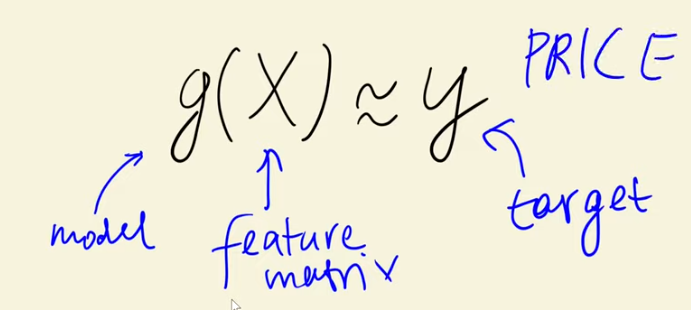

So our model is g, df_train, df_val and df_test are matricour feature matrices and our targets are the variables we created with y_train, y_val and y_test

In [64]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


We can look at different records in our dataset, below we are looking at the row indexed at 10 using the `.loc[]` method.

In [65]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

We are going to choose engine_hp, city_mpg and popularity.

In [66]:
xi = [453, 11, 86]
# this is our feature set for our example

Now we will right a short function to predict a price based on the feature set we chose.

In [67]:
def g(xi):
    # do something
    return 10000

In [68]:
g(xi)

10000

In [69]:
w0 = 0
w = [1, 1, 1]

Each feature in xi will be assigned a weight to either increase or decrease the efficacy on the price of a vehicle.

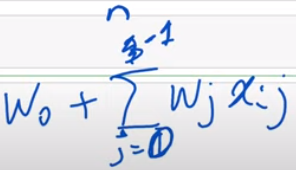

With Python we start at 0 so it would be from 0 to 2 for our 3 features.

In [70]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [71]:
linear_regression(xi)

550

So our prediction was 550 for the price of the vehicle, in log + 1.  It isn't correct because w0 and w aren't the correct starting points, that is where machine learning comes in but lets keep working at this solution. Keep in mind the returns we are getting are in a log price that have to back-transform the log. Also, because we did `np.log1p()` which added a 1, we can use `np.expm1` to back-transform and subtract 1. 

In [72]:
xi = [453, 11, 86] # features
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights

In [73]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [74]:
linear_regression(xi)

12.312

Back-transform the log.

In [75]:
np.expm1(linear_regression(xi))

222347.2221101062

The value above is our first attempt and predicting the price of the Rolls-Royce @ 222,347

# 2.6 Linear regression: vector form

The formula of LR can be synthesized with the dot product between features and weights. The feature vector includes the bias term with an x value of one. When all the records are included, the LR can be calculated with the dot product between feature matrix and vector of weights, obtaining the y vector of predictions.

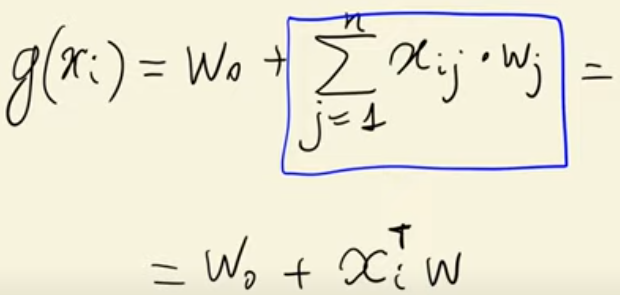

In [84]:
def dot(xi, w):
    n = len(xi)
        
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [85]:
w_new = [w0] + w

In [86]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [87]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [88]:
linear_regression(xi)

12.312

Now we will do another prediction on another record (making some numbers up just for the example)

In [ ]:
w_new = [w0] + w
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights

In [92]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [95]:
def linear_regression(X):
    return X.dot(w_new)

In [96]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.7 Training linear regression: Normal equation

Obtaining predictions as close as possible to y target values requires the calculation of weights from the general LR equation. The feature matrix does not have an inverse because it is not square, so it is required to obtain an approximate solution, which can be obtained using the Gram matrix (multiplication of feature matrix and its transpose). The vector of weights or coefficients obtained with this formula is the closest possible solution to the LR system.

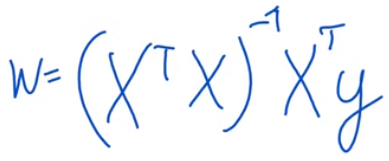

In [98]:
def train_linear_regression(X, y):
    pass

In [128]:
X = [[148, 24, 1385], 
     [132, 25, 2031], 
     [453, 11, 86],
     [158, 24, 185], 
     [172, 25, 201], 
     [413, 11, 86],
     [38, 54, 185], 
     [142, 25, 431], 
     [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

We need to add our bias terms into the array, which will be 1's. We will take the shape of the array above and assign the row count to the `np.ones` method to create a vector of 1's to match the matrix and then we will append that vector to the matrix

In [114]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [116]:
X = np.column_stack([ones, X])

We need to create a y vector.

In [117]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [118]:
XTX = X.T.dot(X) # this is our Gram matrix
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

We now create our inverse matrix, which actuall creates an identity matrix.

In [119]:
XTX_inv = np.linalg.inv(XTX)

We can use the dot product of XTX and XTX_inv to see if we have created an identity matrix, and we have.

In [120]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [121]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [123]:
w0 = w_full[0]
w = w_full[1:]

w0, w

(300.06776692555707, array([-0.22774253, -2.5769413 , -0.02301206]))

In [131]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [132]:
train_linear_regression(X, y)

(300.06776692555707, array([-0.22774253, -2.5769413 , -0.02301206]))

# 2.8 Baseline model for car price prediction project

The LR model obtained in the previous section was used with the dataset of car price prediction. For this model, only the numerical variables were considered. The training data was pre-processed, replacing the NaN values with 0, in such a way that these values were omitted by the model. Then, the model was trained and it allowed to make predictions on new data. Finally, distributions of y target variable and predictions were compared by plotting their histograms.

# 2.9 Root mean squared error

The RMSE is a measure of the error associated with a model for regression tasks. The video explained the RMSE formula in detail and implemented it in Python.

# 2.10 Using RMSE on validation data

Calculation of the RMSE on validation partition of the dataset of car price prediction. In this way, we have a metric to evaluate the model's performance.

# 2.11 Feature engineering

The feature age of the car was included in the dataset, obtained with the subtraction of the maximum year of cars and each of the years of cars. This new feature improved the model performance, measured with the RMSE and comparing the distributions of y target variable and predictions.

# 2.12 Categorical variables

Categorical variables are typically strings, and pandas identify them as object types. These variables need to be converted to a numerical form because the ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

# 2.13 Regularization

If the feature matrix has duplicated columns, it does not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a parameter of the model. After applying regularization the model performance improved.

# 2.14 Tuning the model

The tuning consisted of finding the best regularization value, using the validation partition of the dataset. After obtaining the best regularization value, the model was trained with this regularization parameter.

# 2.15 Using the model

After finding the best model and its parameters, it was trained with training and validation partitions and the final evaluation was calculated on the test partition. Finally, the final model was used to predict the price of new cars.

# 2.16 Car price prediction project summary

In summary, this session covered some topics, including data preparation, exploratory data analysis, the validation framework, linear regression model, LR vector and normal forms, the baseline model, root mean squared error, feature engineering, regularization, tuning the model, and using the best model with new data. All these concepts were explained using the problem to predict the price of cars.